<a href="https://colab.research.google.com/github/harshitgupta5/Chest-Pneumonia-Detection/blob/master/Project/Chest_X_Ray_Pneumonia_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest X-Ray Pneumonia Data Exploration
###### Harshit Gupta

## Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sm

## Uploading Kaggle Credentials < Redacted > 

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"harshitgupta5","key":"1011676b44e6ddea0fa9079864d764a9"}'}

## Installing Kaggle Library to Import Data

In [31]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [32]:
!cp kaggle.json ~/.kaggle/

## Downloading the Data 

In [33]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!ls

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)
 chest-xray-pneumonia	   'kaggle (1).json'   sample_data
 chest-xray-pneumonia.zip   kaggle.json


## Unzipping Data from .zip

In [34]:
from zipfile import ZipFile
zip_file = ZipFile('/content/chest-xray-pneumonia.zip')
zip_file.extractall('/content/chest-xray-pneumonia')

In [35]:
!ls /content/chest-xray-pneumonia/chest_xray/chest_xray

test  train  val


## Setting Directory Paths for Train, Test & Validation Set

In [36]:
import os
# Directory with our training n
train_NORMAL_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL')

# Directory with our training p
train_PNEUMONIA_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA')

# Directory with our test n
test_NORMAL_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL')

# Directory with our test p
test_PNEUMONIA_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA')

# Directory with our test n
val_NORMAL_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL')

# Directory with our test p
val_PNEUMONIA_dir = os.path.join('/content/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA')



## Count of each class in each dataset
Train | Validation | Test 

In [37]:
print("Training Set")
train_NORMAL_names = os.listdir(train_NORMAL_dir)
print("Normal X-Rays: " + str(len(train_NORMAL_names)))
train_PNEUMONIA_names = os.listdir(train_PNEUMONIA_dir)
print("Pneumonia X-Rays: " + str(len(train_PNEUMONIA_names)))
print()
print("Test Set")
test_NORMAL_names = os.listdir(test_NORMAL_dir)
print("Normal X-Rays: " + str(len(test_NORMAL_names)))
test_PNEUMONIA_names = os.listdir(test_PNEUMONIA_dir)
print("Pneumonia X-Rays: " + str(len(test_PNEUMONIA_names)))
print()
print("Validation Set")
val_NORMAL_names = os.listdir(val_NORMAL_dir)
print("Normal X-Rays: " + str(len(val_NORMAL_names)))
val_PNEUMONIA_names = os.listdir(val_PNEUMONIA_dir)
print("Pneumonia X-Rays: " + str(len(val_PNEUMONIA_names)))
print()

Training Set
Normal X-Rays: 1342
Pneumonia X-Rays: 3876

Test Set
Normal X-Rays: 234
Pneumonia X-Rays: 390

Validation Set
Normal X-Rays: 9
Pneumonia X-Rays: 9



As we can see, the data is quite balanced in Training and Test Set. The vaidation set is very small which me bring in bias at the time of training. We may look into it at the time of training.

## Viewing the Filenames of a sample of 10 from the training set
 (Not touching validation and test set to be totally clueless about them)

In [38]:
train_NORMAL_names = os.listdir(train_NORMAL_dir)
print(train_NORMAL_names[:10])
train_PNEUMONIA_names = os.listdir(train_PNEUMONIA_dir)
print(train_PNEUMONIA_names[:10])


['IM-0539-0001-0001.jpeg', 'IM-0487-0001.jpeg', 'IM-0477-0001.jpeg', 'NORMAL2-IM-0535-0001.jpeg', 'IM-0364-0001.jpeg', 'NORMAL2-IM-0998-0001.jpeg', 'IM-0464-0001.jpeg', 'IM-0605-0001.jpeg', 'IM-0523-0001-0003.jpeg', 'NORMAL2-IM-0797-0001.jpeg']
['person479_virus_978.jpeg', 'person420_bacteria_1848.jpeg', 'person82_virus_155.jpeg', 'person848_virus_1493.jpeg', 'person997_bacteria_2926.jpeg', 'person452_bacteria_1943.jpeg', 'person594_virus_1145.jpeg', 'person315_bacteria_1464.jpeg', 'person1227_virus_2078.jpeg', 'person1376_virus_2367.jpeg']


## Viewing Samples from Training Set
The first 8 images are normal X-Rays.
The remaining 8 are Pneumonia X-Rays

### Preparing the images and loading into variables to display

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 4

# Index for iterating over images
pic_index = 0

pic_index += 8
next_normal_pix = [os.path.join(train_NORMAL_dir, fname) 
                for fname in train_NORMAL_names[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_PNEUMONIA_dir, fname) 
                for fname in train_PNEUMONIA_names[pic_index-8:pic_index]]

### Normal X-Rays

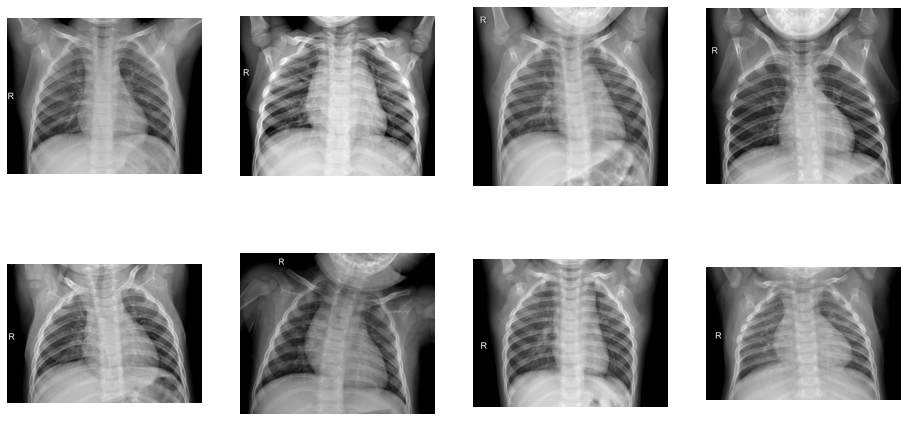

In [40]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(next_normal_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')

plt.show()

### Pneumonia X-Rays

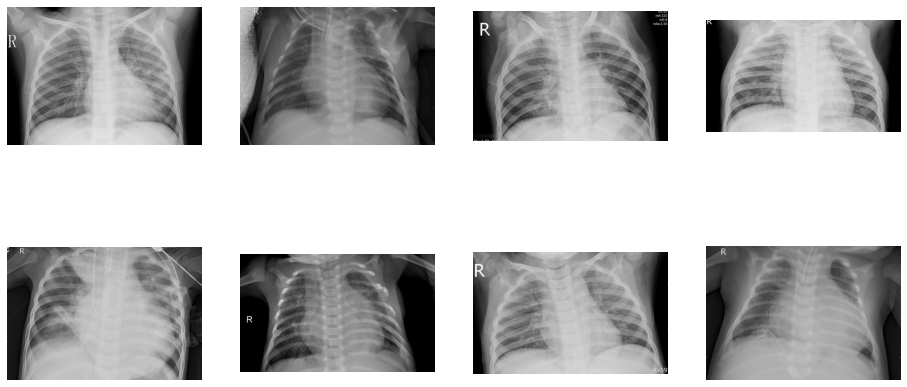

In [41]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')

plt.show()

### Installing library  
We will need it at the time of building and training the model

In [42]:
!pip install tensorflow-gpu==2.0.0-rc0

## Preparing Data to feed into a model

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip=True
                                  )
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/chest_xray/train',  # This is the source directory for training images
        target_size=(224, 224),  
        
        # Since we use binary_crossentropy loss, we need binary labels
        classes = ["NORMAL", "PNEUMONIA"],
        class_mode = "categorical")

# All images will be rescaled by 1./255
val_datagen = ImageDataGenerator(rescale=1./255
                                  )

val_generator = val_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/chest_xray/val',  
        target_size=(224, 224),
        
        classes = ["NORMAL", "PNEUMONIA"],
        class_mode = "categorical")


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/chest_xray/test',  
        target_size=(224, 224),
        classes = ["NORMAL", "PNEUMONIA"],
        class_mode = "categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Results


*   The data utilized 2.9GBs on disk
*   The dataset is split into 3 sets
  * Training Set
     * Normal X-Rays: 1342
     * Pneumonia X-Rays: 3876

  * Test Set
     * Normal X-Rays: 234
     * Pneumonia X-Rays: 390

  * Validation Set
     * Normal X-Rays: 9
     * Pneumonia X-Rays: 9
*   The data doesn't require cleaning as it is already clean







In [67]:
import glob
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization,Input, SeparableConv2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [69]:
def build_model():
    input_img = Input(shape=train_generator.image_shape, name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.7)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)
        
    model = Model(inputs=input_img, outputs=x)
    
    return model

In [75]:
def create_plots(history):    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [71]:
model= build_model()
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 112, 112, 128)     8896      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 112, 112, 128)     17664     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 128)       0   

### Plot of Model

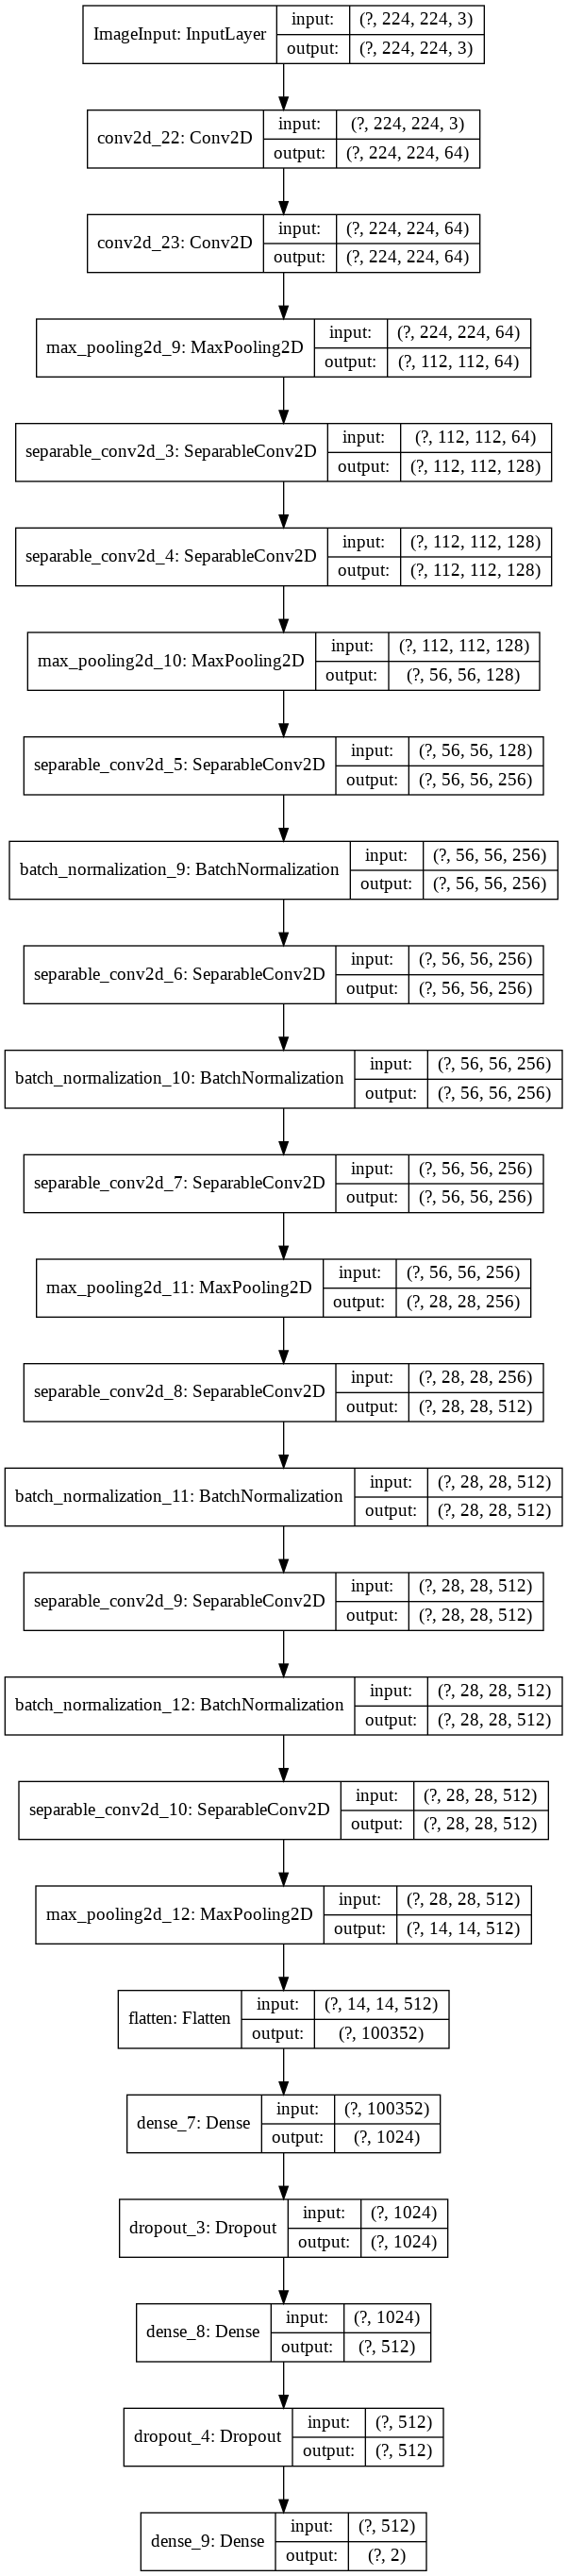

In [ ]:
tensorflow.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

## Training

In [73]:
batch_size = 16
epochs = 50
early_stop = EarlyStopping(patience=25,
                           verbose = 2,
                           monitor='val_loss',
                           mode='auto')

checkpoint = ModelCheckpoint(
    filepath='best_model',
    save_best_only=True,
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    verbose = 1)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    verbose=1, 
    mode='auto',
    min_delta=0.0001, 
    cooldown=1, 
    min_lr=0.0001
)

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(lr=0.0001))

history = model.fit_generator(epochs=epochs,
                              callbacks=[early_stop,checkpoint,reduce],
                              shuffle=True,
                              validation_data=val_generator,
                              generator=train_generator,
                              steps_per_epoch=500,
                              validation_steps=10,)

Epoch 1/50
500/500 [==============================] - 562s 1s/step - loss: 0.2585 - accuracy: 0.8861 - val_loss: 0.6891 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.68906, saving model to best_model
Epoch 2/50
500/500 [==============================] - 558s 1s/step - loss: 0.1716 - accuracy: 0.9333 - val_loss: 0.5906 - val_accuracy: 0.7500

Epoch 00002: val_loss improved from 0.68906 to 0.59059, saving model to best_model
Epoch 3/50
500/500 [==============================] - 556s 1s/step - loss: 0.1515 - accuracy: 0.9417 - val_loss: 2.2014 - val_accuracy: 0.6250

Epoch 00003: val_loss did not improve from 0.59059
Epoch 4/50
500/500 [==============================] - 558s 1s/step - loss: 0.1412 - accuracy: 0.9474 - val_loss: 1.2271 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.59059
Epoch 5/50
500/500 [==============================] - 557s 1s/step - loss: 0.1246 - accuracy: 0.9544 - val_loss: 1.1534 - val_accuracy: 0.5000

Epoch 00005: val

## Loss and Accuracy Plots

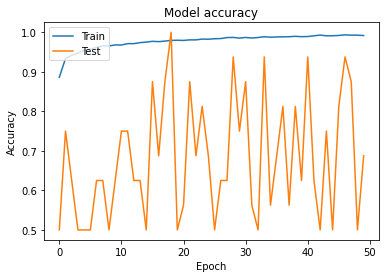

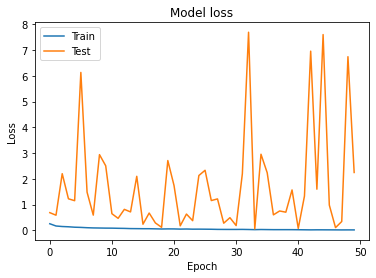

In [76]:
create_plots(history)

### Fetching images and labels

In [80]:
original_test_label=[]
images=[]
normal = Path(test_NORMAL_dir).glob('*.jpeg')
for i in normal:
    img = cv2.imread(str(i))
#     print("normal",img)
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    try:
        img = cv2.resize(img, (224,224))
    except Exception as e:
        print(str(e))
    images.append(img)
    label = to_categorical(0, num_classes=2)
    original_test_label.append(label)


pneumonia = Path(test_PNEUMONIA_dir).glob('*.jpeg')
for i in pneumonia:
    img = cv2.imread(str(i))
#     print("pneumonia",img)
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    try:
        img = cv2.resize(img, (224,224))
    except Exception as e:
        print(str(e))
    images.append(img)
    label = to_categorical(1, num_classes=2)
    original_test_label.append(label)    

    
images = np.array(images)
original_test_label = np.array(original_test_label)
print(original_test_label.shape)



(624, 2)


### Prediction on Test Set Images

In [81]:
p = model.predict(images, batch_size=16)
preds = np.argmax(p, axis=-1)
print(preds.shape)

(624,)


### Evaluation of model on test images

In [83]:
test_loss, test_score = model.evaluate_generator(test_generator,steps=100)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

Loss on test set:  2.3062775135040283
Accuracy on test set:  0.8028846383094788


### Validation Accuracy and Recall Score

In [88]:
print("Accuracy: " + str(history.history['val_accuracy'][-1:]))


Accuracy: [0.6875]
